In [22]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense,Flatten,MaxPool2D
import numpy as np

In [23]:
datagen=ImageDataGenerator(rescale=1/255,horizontal_flip=True,rotation_range=10)

In [24]:
train=datagen.flow_from_directory('/home/user/Downloads/Face Mask Dataset/Train',target_size=(224,224),batch_size=30)
test=datagen.flow_from_directory('/home/user/Downloads/Face Mask Dataset/Test',target_size=(224,224),batch_size=30)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [25]:
class_labels=train.class_indices
class_labels={k:v for v,k in class_labels.items()}
classes = list(class_labels.values())
class_labels

{0: 'WithMask', 1: 'WithoutMask'}

WithoutMask


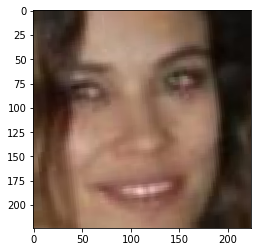

WithoutMask


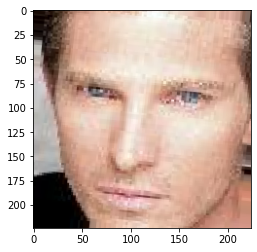

WithoutMask


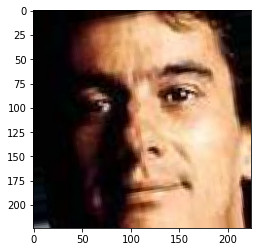

WithMask


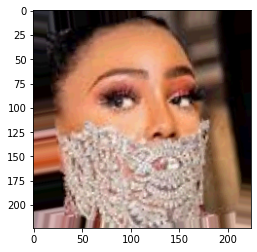

WithMask


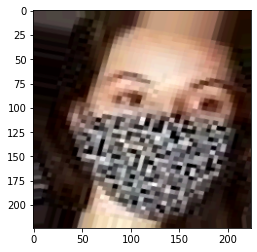

WithMask


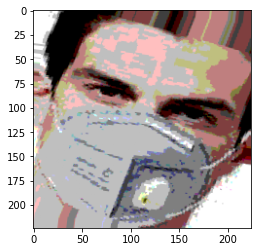

In [26]:
for i in [0,5,10,15,20,25]:
    result=np.argmax(train[0][1][i])
    print(classes[result])
    plt.imshow(train[0][0][i])
    plt.show()

In [27]:
vgg=MobileNetV2(weights='imagenet')
for layer in vgg.layers:
    layer.trainable = False

In [28]:
vgg_input = vgg.layers[0].input
vgg_output = vgg.layers[-2].output
predictions = Dense(2)(vgg_output)
model=Model(inputs = vgg_input,outputs = predictions)

In [31]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [32]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics='accuracy')

In [33]:
history = model.fit(train, epochs = 10)

Epoch 1/10
334/334 [==============================] - 210s 628ms/step - loss: 2.2040 - accuracy: 0.8184
Epoch 2/10
334/334 [==============================] - 227s 680ms/step - loss: 0.3307 - accuracy: 0.9711
Epoch 3/10
334/334 [==============================] - 210s 629ms/step - loss: 0.2646 - accuracy: 0.9800
Epoch 4/10
334/334 [==============================] - 228s 681ms/step - loss: 0.3455 - accuracy: 0.9744
Epoch 5/10
334/334 [==============================] - 229s 684ms/step - loss: 0.1690 - accuracy: 0.9844
Epoch 6/10
334/334 [==============================] - 229s 686ms/step - loss: 0.1541 - accuracy: 0.9864
Epoch 7/10
334/334 [==============================] - 230s 688ms/step - loss: 0.6015 - accuracy: 0.9720
Epoch 8/10
334/334 [==============================] - 218s 652ms/step - loss: 0.4154 - accuracy: 0.9779
Epoch 9/10
334/334 [==============================] - 221s 661ms/step - loss: 0.2584 - accuracy: 0.9820
Epoch 10/10
334/334 [==============================] - 227s 678m

In [34]:
model.evaluate(test)

34/34 [==============================] - 23s 663ms/step - loss: 0.1212 - accuracy: 0.9899


[0.12123063206672668, 0.9899193644523621]


actual =  WithoutMask
predicted =  WithoutMask


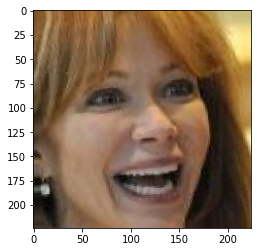


actual =  WithMask
predicted =  WithMask


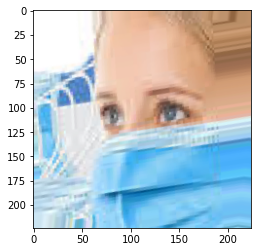


actual =  WithMask
predicted =  WithMask


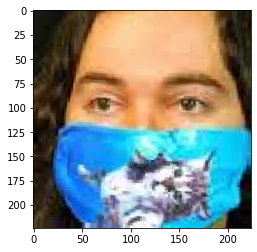


actual =  WithMask
predicted =  WithMask


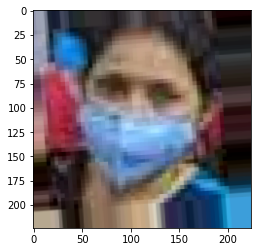


actual =  WithoutMask
predicted =  WithoutMask


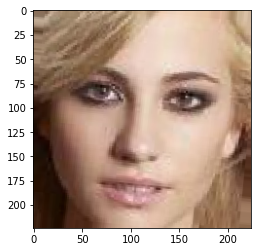


actual =  WithMask
predicted =  WithMask


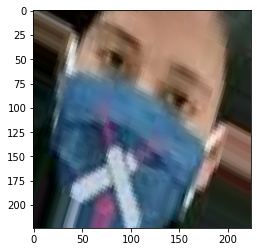


actual =  WithoutMask
predicted =  WithoutMask


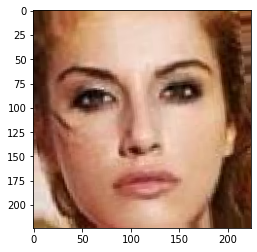


actual =  WithoutMask
predicted =  WithoutMask


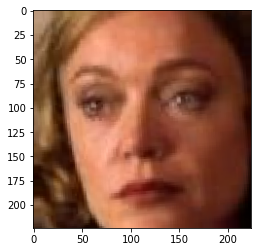

In [35]:
for i in range(0,30,4):
    result=np.argmax(test[0][1][i])
    print('\nactual = ',classes[result])
    test_image=np.expand_dims(test[0][0][i],axis=0)
    print('predicted = ',classes[np.argmax(model.predict(test_image))])
    plt.imshow(test[0][0][i])
    plt.show()

In [36]:
model.save('face_mask.h5')